In [1]:
#Import the required libraries

import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#pip install shap

In [3]:
data = pd.read_csv("/Users/sneka/Downloads/extracted_data_with_contents_full.csv")

print(data.shape)
data.head()

(1013, 4)


,ID,URL,Is lighting product?,Extracted_Content
0,P-0,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,FEATURES\n•Different color and beam configurat...
1,P-1,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,Recommended Use:\n•Architectural\n•Landscaping...
2,P-2,https://myelektralite.com/assets/1018-AI-Outdo...,Yes,NaN
3,P-3,https://myelektralite.com/assets/1018-Data-She...,Yes,NaN
4,P-4,https://myelektralite.com/assets/1018AI-Data-S...,Yes,NaN


In [4]:
data.isnull().sum()

ID                       13
URL                      13
Is lighting product?     13
Extracted_Content       277
dtype: int64

In [5]:
df = data.dropna()

In [6]:
print(df.shape)
df.head()

(736, 4)


,ID,URL,Is lighting product?,Extracted_Content
0,P-0,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,FEATURES\n•Different color and beam configurat...
1,P-1,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,Recommended Use:\n•Architectural\n•Landscaping...
12,P-12,https://en.everlight.com/wp-content/plugins/It...,No,"EVERLIGHT ELECTRONICS CO.,LTD. \n Everlight E..."
13,P-13,https://en.everlight.com/wp-content/plugins/It...,Yes,"\n1 \nCopyright © 2010, Everlight All Rights..."
14,P-14,https://en.everlight.com/wp-content/plugins/It...,Yes,"\n1 \nCopyright © 2010, Everlight All Rights..."


In [7]:
df['Is lighting product?'].value_counts()

Is lighting product?
Yes    392
No     344
Name: count, dtype: int64

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
import re

In [9]:
# Define custom list of stopwords including common words and domain-specific terms
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["none", "some", "something", "be", "by", "on", "all", "of", "not", "at", "without", "and", "another", "other", "more", "less", "many", "few", "the", "for", "is", "to", "with"])


In [10]:
def clean_text(text):
    # Check if the text is not NaN
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs and email addresses
    text = re.sub(r'\b(?:https?://|www\.)\S+\b', '', text)
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

    # Remove non-alphanumeric characters and numerical values
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    word_tokens = word_tokenize(text)
    
    # Remove stopwords
    filtered_text = [word for word in word_tokens if word not in custom_stopwords]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]
    
    # Join the stemmed words back into a single string
    text = ' '.join(stemmed_text)
    
    return text

# Assuming df is your DataFrame and 'Extracted_Content' is the column containing text data
df['Cleaned_Content'] = df['Extracted_Content'].apply(clean_text)

/var/folders/27/wzmpkqfn1c3dpl904hw7bvvr0000gp/T/ipykernel_83209/19889169.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Content'] = df['Extracted_Content'].apply(clean_text)


In [11]:
df.head()

,ID,URL,Is lighting product?,Extracted_Content,Cleaned_Content
0,P-0,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,FEATURES\n•Different color and beam configurat...,featur differ color beam configur avail alumin...
1,P-1,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,Recommended Use:\n•Architectural\n•Landscaping...,recommend use architectur landscap gener exter...
12,P-12,https://en.everlight.com/wp-content/plugins/It...,No,"EVERLIGHT ELECTRONICS CO.,LTD. \n Everlight E...",everlight electron coltd everlight electron co...
13,P-13,https://en.everlight.com/wp-content/plugins/It...,Yes,"\n1 \nCopyright © 2010, Everlight All Rights...",copyright everlight right reserv releas date s...
14,P-14,https://en.everlight.com/wp-content/plugins/It...,Yes,"\n1 \nCopyright © 2010, Everlight All Rights...",copyright everlight right reserv releas date d...


In [12]:
df.shape

(736, 5)

In [13]:
#Mapping the values

df['target'] = df['Is lighting product?'].map({
    'Yes' : 1,
    'No'  : 0
})

/var/folders/27/wzmpkqfn1c3dpl904hw7bvvr0000gp/T/ipykernel_83209/923690625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['Is lighting product?'].map({


In [14]:
data_vector = TfidfVectorizer()
tranformed_output = data_vector.fit_transform(df['Cleaned_Content'])
print(data_vector.vocabulary_)

{'featur': 6205, 'differ': 4466, 'color': 2977, 'beam': 1476, 'configur': 3227, 'avail': 1232, 'aluminum': 547, 'alloy': 479, 'hous': 7525, 'high': 7377, 'heat': 7306, 'dissip': 4628, 'perform': 11823, 'univers': 16851, 'power': 12290, 'suppli': 15668, 'easi': 5040, 'instal': 8077, 'year': 17997, 'warranti': 17532, 'electr': 5258, 'input': 8032, 'vac': 17038, 'etl': 5826, 'list': 9217, 'decor': 4065, 'led': 8926, 'dual': 4924, 'light': 9136, 'usa': 16961, 'llc': 9257, 'phone': 11933, 'ailabl': 358, 'blue': 1752, 'green': 7075, 'amber': 560, 'warm': 17524, 'white': 17680, 'cool': 3449, 'red': 13339, 'purpl': 12814, 'photometr': 11946, 'hm': 7437, 'medlux': 9913, 'maxlux': 9864, 'recommend': 13305, 'use': 16974, 'architectur': 868, 'landscap': 8727, 'gener': 6857, 'exterior': 6024, 'hotel': 7519, 'sign': 14757, 'flag': 6396, 'multiunit': 10560, 'residenti': 13653, 'commerci': 3050, 'govern': 7021, 'build': 1992, 'dusqhw': 4975, 'detail': 4311, 'sourc': 15118, 'cree': 3631, 'lamp': 8705, 

In [15]:
tranformed_output

<736x18116 sparse matrix of type '<class 'numpy.float64'>'
	with 133676 stored elements in Compressed Sparse Row format>

In [16]:
data_vector

TfidfVectorizer()

In [17]:
# After fitting the TF-IDF vectorizer to your data
tfidf_matrix = data_vector.fit_transform(df['Cleaned_Content'])

# Convert the sparse matrix to a dense matrix for better readability
dense_matrix = tfidf_matrix.toarray()

# Convert the dense matrix to a DataFrame with column names
tfidf_df = pd.DataFrame(dense_matrix, columns=data_vector.get_feature_names_out())

# Print the DataFrame
#print(tfidf_df)

tfidf_matrix


<736x18116 sparse matrix of type '<class 'numpy.float64'>'
	with 133676 stored elements in Compressed Sparse Row format>

In [18]:
# Get the learned vocabulary and IDF scores from the TF-IDF vectorizer
vocabulary = data_vector.get_feature_names_out()
idf_scores = data_vector.idf_

# Create a DataFrame to store the features and their IDF scores
idf_df = pd.DataFrame({'Term': vocabulary, 'IDF Score': idf_scores})

# Sort the DataFrame by IDF scores to see the most important features
idf_df_sorted = idf_df.sort_values(by='IDF Score', ascending=False)

# Print the top features
print("Top features used by TF-IDF for categorization:")
print(idf_df_sorted.head(10))


Top features used by TF-IDF for categorization:
                   Term  IDF Score
9058                lhi   6.909441
8163        intermdiair   6.909441
8148       interconecta   6.909441
8151           interdis   6.909441
8152           interess   6.909441
8153        interessata   6.909441
15268            srrcsv   6.909441
8159   interiorexterior   6.909441
15266            srpsmk   6.909441
15265         srpendant   6.909441


In [19]:
# Separate the data into lighting and non-lighting products
lighting_data = df[df['target'] == 1]['Cleaned_Content']
non_lighting_data = df[df['target'] == 0]['Cleaned_Content']

# Fit separate TF-IDF vectorizers for lighting and non-lighting products
lighting_vectorizer = TfidfVectorizer()
non_lighting_vectorizer = TfidfVectorizer()

lighting_tfidf_matrix = lighting_vectorizer.fit_transform(lighting_data)
non_lighting_tfidf_matrix = non_lighting_vectorizer.fit_transform(non_lighting_data)

# Get the vocabulary and IDF scores for lighting and non-lighting products
lighting_vocabulary = lighting_vectorizer.get_feature_names_out()
lighting_idf_scores = lighting_vectorizer.idf_

non_lighting_vocabulary = non_lighting_vectorizer.get_feature_names_out()
non_lighting_idf_scores = non_lighting_vectorizer.idf_

# Create DataFrames to store the features and their IDF scores for lighting and non-lighting products
lighting_idf_df = pd.DataFrame({'Term': lighting_vocabulary, 'IDF Score (Lighting)': lighting_idf_scores})
non_lighting_idf_df = pd.DataFrame({'Term': non_lighting_vocabulary, 'IDF Score (Non-Lighting)': non_lighting_idf_scores})

# Sort the DataFrames by IDF scores to see the most important features
lighting_idf_df_sorted = lighting_idf_df.sort_values(by='IDF Score (Lighting)', ascending=False)
non_lighting_idf_df_sorted = non_lighting_idf_df.sort_values(by='IDF Score (Non-Lighting)', ascending=False)

# Print the top features for lighting and non-lighting products
print("Top features for lighting products:")
print(lighting_idf_df_sorted.tail(50))

print("\nTop features for non-lighting products:")
print(non_lighting_idf_df_sorted.tail(50))


Top features for lighting products:
          Term  IDF Score (Lighting)
4207     notic              2.061155
1706       dim              2.053829
6626      watt              2.046556
464       base              2.032167
2025    electr              2.017983
6658    weight              1.983377
4845    provid              1.983377
3045     input              1.983377
4204      note              1.969863
3961        mm              1.956530
3438    length              1.949929
5200     right              1.949929
4827   project              1.943372
2324    featur              1.886213
3055    instal              1.880059
4382     order              1.873943
6338        ul              1.873943
246     applic              1.867864
2386    fixtur              1.867864
6609  warranti              1.861822
6593      wall              1.855816
4989      rate              1.849846
3547     locat              1.843911
988      chang              1.838011
1412       cri              1.838011
64

In [20]:
df.head()

,ID,URL,Is lighting product?,Extracted_Content,Cleaned_Content,target
0,P-0,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,FEATURES\n•Different color and beam configurat...,featur differ color beam configur avail alumin...,1
1,P-1,https://a4b6eb24-cef6-4be0-88b1-aa225dd7e4f7.u...,Yes,Recommended Use:\n•Architectural\n•Landscaping...,recommend use architectur landscap gener exter...,1
12,P-12,https://en.everlight.com/wp-content/plugins/It...,No,"EVERLIGHT ELECTRONICS CO.,LTD. \n Everlight E...",everlight electron coltd everlight electron co...,0
13,P-13,https://en.everlight.com/wp-content/plugins/It...,Yes,"\n1 \nCopyright © 2010, Everlight All Rights...",copyright everlight right reserv releas date s...,1
14,P-14,https://en.everlight.com/wp-content/plugins/It...,Yes,"\n1 \nCopyright © 2010, Everlight All Rights...",copyright everlight right reserv releas date d...,1


In [21]:
X = df['Cleaned_Content']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=df['target'])


In [22]:
print(X_train.shape)

(588,)


In [23]:
print(X_test.shape)

(148,)


In [24]:
y_train.value_counts()

target
1    313
0    275
Name: count, dtype: int64

In [25]:
y_train.value_counts()

target
1    313
0    275
Name: count, dtype: int64

In [26]:
y_test.value_counts()

target
1    79
0    69
Name: count, dtype: int64

In [27]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = Pipeline([
('vectorizer_tfidf', TfidfVectorizer()),
('MNN', MultinomialNB())
])

clf_nb.fit(X_train, y_train)

y_pred = clf_nb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        69
           1       0.91      1.00      0.95        79

    accuracy                           0.95       148
   macro avg       0.95      0.94      0.95       148
weighted avg       0.95      0.95      0.95       148



In [28]:
X_test[:5]

819    switchabl lumen cct technolog maxim inventori ...
823    srt edgelit ceilingsurfacegarag currentlightin...
804    celem recess emerg light currentlightingcomcom...
970    ten standard design make cscx line stainless s...
677    omni low voltag ultrason ceil sensor ceil moun...
Name: Cleaned_Content, dtype: object

In [29]:
y_test[:5]

819    1
823    1
804    1
970    0
677    0
Name: target, dtype: int64

In [30]:
y_pred[:5]

array([1, 1, 1, 0, 0])

In [31]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[61  8]
 [ 0 79]]


In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions on the training data
y_train_pred = clf_nb.predict(X_train)

# Print classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Calculate accuracy for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on Training Data:", accuracy_train)

# Generate confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Data:")
print(conf_matrix_train)


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       275
           1       0.93      0.99      0.96       313

    accuracy                           0.95       588
   macro avg       0.96      0.95      0.95       588
weighted avg       0.96      0.95      0.95       588

Accuracy on Training Data: 0.9540816326530612
Confusion Matrix for Training Data:
[[251  24]
 [  3 310]]


MISCLASSIFICATIONS

TRAIN MISCLASSIFICATIONS

In [33]:
# Create a DataFrame to store ID, URL, actual label, and predicted label for training data
train_results = pd.DataFrame({'ID': X_train.index,
                              'URL': df.loc[X_train.index, 'URL'],
                              'Actual': y_train,
                              'Predicted': y_train_pred})

# Find misclassifications in the training data
train_misclassifications = train_results[train_results['Actual'] != train_results['Predicted']]

# Print misclassifications
print("Misclassifications in the training data:")
print(train_misclassifications)


Misclassifications in the training data:
      ID                                                URL  Actual  Predicted
770  770  https://cdn.currentlighting.com/site/specsheet...       1          0
498  498  https://www.jlc-tech.com/wp-content/uploads/20...       0          1
104  104  https://www.houseofantiquehardware.com/Product...       0          1
124  124  https://www.sstlighting.com/CatalogPages/Drive...       0          1
357  357  http://solidapollo.com/PDF/Dynamic-White-Glass...       0          1
490  490  https://www.jlc-tech.com/wp-content/uploads/20...       0          1
313  313  https://www.mullanlighting.com/us/mst_attachme...       0          1
538  538  https://prod-edam.honeywell.com/content/dam/ho...       1          0
90    90  https://www.b-td.com/s/INOS_SideTable_TechShee...       0          1
780  780  https://cdn.currentlighting.com/site/specsheet...       0          1
927  927  https://matthewsfanco.com/wp-content/uploads/2...       0          1
832  832  h

In [45]:
# Save misclassifications to a CSV file
train_misclassifications.to_csv('train_MNB_misclassifications.csv', index=False)


In [44]:
#train_misclassifications.to_numpy()

TEST MISCLASSIFICATIONS

In [35]:
# Create a DataFrame to store ID, URL, actual label, and predicted label for test data
test_results = pd.DataFrame({'ID': X_test.index,
                             'URL': df.loc[X_test.index, 'URL'],
                             'Actual': y_test,
                             'Predicted': y_pred})

# Find misclassifications in the test data
test_misclassifications = test_results[test_results['Actual'] != test_results['Predicted']]

# Print misclassifications
print("Misclassifications in the test data:")
print(test_misclassifications)


Misclassifications in the test data:
      ID                                                URL  Actual  Predicted
111  111  https://www.houseofantiquehardware.com/Product...       0          1
80    80  https://cdn2.toro.com/en/-/media/Files/Unique/...       0          1
491  491  https://www.jlc-tech.com/wp-content/uploads/20...       0          1
114  114    http://primolanterns.com/img/Drawings/AT-22.pdf       0          1
428  428  https://wp4d77.p3cdn1.secureserver.net/wp-cont...       0          1
359  359  http://solidapollo.com/PDF/Magro-RGB-W-Control...       0          1
833  833  https://www.pennconduit.com/wp-content/uploads...       0          1
698  698  http://www.puroluxco.com/__static/0cb1f0423f88...       0          1


In [46]:
# Save misclassifications to a CSV file
test_misclassifications.to_csv('test_MNB_misclassifications.csv', index=False)


USER INPUT

In [36]:
message = """DMX is a technology that was
created by the entertainment
industry back in the 90’s to help
link theatrical lighting control
equipment such as dimmers,
control gear and automated
lighting. DMX has been slowly
finding its way into the general
lighting market since multi-LED
architectural lighting fixtures
have become more mainstream
which brings the need for DMX
into non-entertainment lighting
equipment for controlling
sophisticated lighting projects. The DMX is best understood by talking explaining how it works and
how it is wired."""
result = clf_nb.predict([message])
print("Result: ", result[0])

Result:  1


FEATURES VISUALIZATION

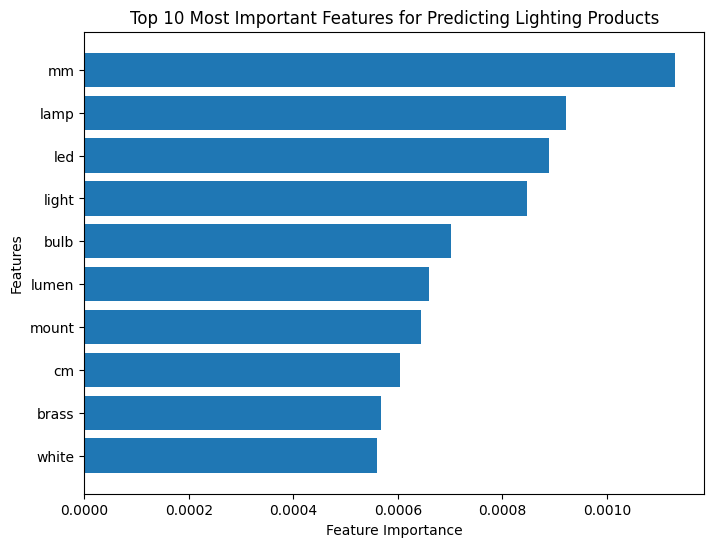

In [38]:
import matplotlib.pyplot as plt

# Get the feature log probabilities from the Multinomial Naive Bayes model
feature_log_prob = clf_nb.named_steps['MNN'].feature_log_prob_

# Calculate feature importance scores
feature_importance = np.exp(feature_log_prob)

# Determine the top N most important features
top_n = 10  
top_indices = np.argsort(feature_importance[1])[-top_n:]  

# Get feature names from the TF-IDF vectorizer
feature_names = clf_nb.named_steps['vectorizer_tfidf'].get_feature_names_out()

# Plot only the top N most important features
plt.figure(figsize=(8, 6))
plt.barh(range(top_n), feature_importance[1][top_indices], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top {} Most Important Features for Predicting Lighting Products'.format(top_n))
plt.show()

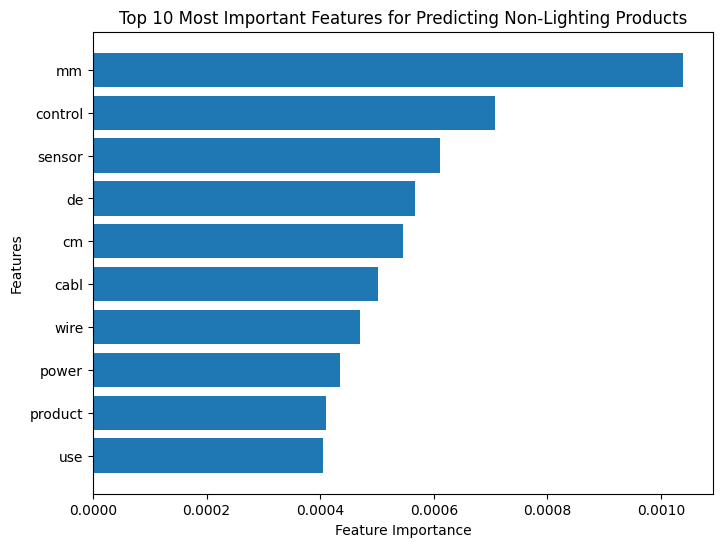

In [39]:
# Get the feature log probabilities from the Multinomial Naive Bayes model
feature_log_prob = clf_nb.named_steps['MNN'].feature_log_prob_

# Calculate feature importance scores for the negative class (non-lighting products)
non_lighting_feature_importance = np.exp(feature_log_prob[0])  

# Determine the top N most important features
top_n = 10  
top_indices = np.argsort(non_lighting_feature_importance)[-top_n:]

# Get feature names from the TF-IDF vectorizer
feature_names = clf_nb.named_steps['vectorizer_tfidf'].get_feature_names_out()

# Plot only the top N most important features for non-lighting products
plt.figure(figsize=(8, 6))
plt.barh(range(top_n), non_lighting_feature_importance[top_indices], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top {} Most Important Features for Predicting Non-Lighting Products'.format(top_n))
plt.show()

HYPER PARAMETER TUNING

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Pipeline with GridSearchCV for tuning
clf_nb = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('MNN', MultinomialNB())
])

# Parameters to tune
parameters = {
    'vectorizer_tfidf__max_df': (0.5, 0.75, 1.0),
    'vectorizer_tfidf__min_df': (1, 2, 5),
    'vectorizer_tfidf__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'vectorizer_tfidf__stop_words': (None, 'english'),
    'MNN__alpha': (0.1, 0.5, 1.0)
}

# Grid search for parameter tuning
grid_search = GridSearchCV(clf_nb, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters found during grid search
print("Best parameters set found on development set:")
print(grid_search.best_params_)

# Evaluate on test set using best estimator
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


Best parameters set found on development set:
{'MNN__alpha': 0.1, 'vectorizer_tfidf__max_df': 0.5, 'vectorizer_tfidf__min_df': 5, 'vectorizer_tfidf__ngram_range': (1, 2), 'vectorizer_tfidf__stop_words': None}
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        69
           1       0.96      1.00      0.98        79

    accuracy                           0.98       148
   macro avg       0.98      0.98      0.98       148
weighted avg       0.98      0.98      0.98       148



In [41]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[66  3]
 [ 0 79]]


In [43]:
# Create a DataFrame to store ID, URL, actual label, and predicted label for test data
test_results = pd.DataFrame({'ID': X_test.index,
                             'URL': df.loc[X_test.index, 'URL'],
                             'Actual': y_test,
                             'Predicted': y_pred})

# Find misclassifications in the test data
gs_test_misclassifications = test_results[test_results['Actual'] != test_results['Predicted']]

# Print misclassifications
print("Misclassifications in the grid search test data:")
print(gs_test_misclassifications)


Misclassifications in the grid search test data:
      ID                                                URL  Actual  Predicted
111  111  https://www.houseofantiquehardware.com/Product...       0          1
114  114    http://primolanterns.com/img/Drawings/AT-22.pdf       0          1
428  428  https://wp4d77.p3cdn1.secureserver.net/wp-cont...       0          1


In [47]:
# Save misclassifications to a CSV file
gs_test_misclassifications.to_csv('GS_test_MNB_misclassifications.csv', index=False)
